# Caso 6: problema de balance (Min-Max) - Implementación



## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio. 

Este laboratorio tiene las siguientes secciones: 
* **Formulación**: un breve resumen del modelo con notación matemática y descripción de sus componentes
* **Importación de librerías**
* **Creación de parámetros**
* **Modelado**: aquí implementamos el modelo visto en la formulación (aquí encontrarás por lo general celdas de código que debes completar, ¡nosotros te guiaremos en el proceso!)
* **Reporte de Resultados**: esta sección nos muestra las soluciones encontradas por el modelo y, en ocasiones, algunas visualizaciones interesantes para entenderlo mejor. Es posible que en ciertas prácticas debas completar algunas celdas también.

Este tipo de actividades se evaluará sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucción `# your code here`. Antes de estas celdas  encontrarás instrucciones y consejos para resolver las preguntas, también el puntaje que le corresponde.

¡Éxitos!

## Formulación
---

Te presentamos la formulación del caso de la semana de forma resumida. Te recomendamos revisar la formulación una vez hayas leído el enunciado del caso. Es bueno que te familiarices con los elementos de la formulación antes de iniciar la implementación.

### Conjuntos y parámetros
>#### **Conjuntos**
>* $I$: conjunto de depósitos
>* $J$: conjunto de CACs

>#### **Parámetros**
>* $k_i:$ Capacidad del depósito $i \in I$ (miles de toneladas por año)
>* $d_j:$ Producción proyectada del CAC $j\in J$ (miles de tonaledas por año)
>* $q:$ Costo anualizado (por cada mil toneladas por kilómetro) de transportar café
>* $r:$ Distancia máxima (en kilómetros) entre el CAC y el depósito asignado para estar "bien" atendido
>* $h_{ij}:$ Distancia (en kilómetros) entre el CAC $J\in j$ y el depósito $i \in I$
>* $c_{ij}:$ Costo anualizado de atender el CAC $j\in J$ con el depósito $i\in I$ (Se calcula como: $c_{ij} = q*d_j*h_{ij}$)
>* $\psi ^*:$ Costo total de la solución de mínimo costo

### Variables de decisión
>* $x_{ij}= \begin{cases}1, & \text{si el depósito } i\in I \text{ atiende al CAC } j\in J \\ 0, & \text{de lo contrario}\end{cases} $
>>
>* $z$: máxima demanda atendida por un depósito

### Restricciones
> 1. Capturar en $z$ la máxima demanda atendida por un depósito
>> *# Para desarrollo del estudiante*
> 2. Todo CAC debe ser atendido por un depósito
>> *# Para desarrollo del estudiante*
> 3. La demanda atendida por un depósito no puede superar su capacidad
>> *# Para desarrollo del estudiante*
> 4. El costo total de la solución puede ser, a lo sumo, 10% más alto que el de la solución de mínimo costo
>> *# Para desarrollo del estudiante*
> 5. Naturaleza de las variables
>> $x_{ij} \in \{0,1\}, \;\; \forall i\in I,j\in J$

>> $z \geq 0$

### Función objetivo
> Minimizar la máxima demanda atendida por un depósito
>> *# Para desarrollo del estudiante*

## Importación de librerías
---
Como siempre, utilizaremos las librerías `pulp` y `pandas`. Adicionalmente, usaremos algunas funciones de la librería `math` para calcular distancias geográficas de forma rápida y una función de la librería `datetime` para calcular el tiempo de ejecución del optmizador.

In [1]:
# Para tiempo de ejecución
from datetime import datetime

import pandas as pd
import pulp as lp
from geopy.distance import distance

## Creación de parámetros
---

### Conjuntos

Crearemos `Depositos` y `Centros` como listas y un conjunto que contenga las parejas entre estos dos conjuntos `Depositos_x_Centros`.

In [2]:
# Conjunto de depósitos
Depositos = ["Medellín", "La Dorada", "Aguadas", "Salamina"]

# Conjunto de CACs
Centros = [
    "Andes",
    "Medellín",
    "Dabeiba",
    "Salgar",
    "San Pablo de Borbur",
    "Labranzagrande",
    "Miraflores",
    "Moniquirá",
    "Manizales",
    "Anserma",
    "Pensilvania",
    "Riosucio",
    "Aguadas",
    "Morales",
    "El Tambo",
    "Bolívar",
    "Aguachica",
    "San Diego",
    "Caparrapí",
    "Viotá",
    "Sasaima",
    "Neiva",
    "Pitalito",
    "Gigante",
    "Santa Marta",
    "La Unión",
    "Pasto",
    "Samaniego",
    "Sardinata",
    "Ocaña",
    "Convención",
    "Génova",
    "Calarcá",
    "Quimbaya",
    "Pereira",
    "Santuario",
    "Belén de Umbria",
    "Rionegro",
    "Bucaramanga",
    "Barbosa",
    "Socorro",
    "Simacota",
    "Chaparral",
    "Dolores",
    "Ibagué",
    "Líbano",
    "Cartago",
    "Tulua",
    "Jamundí",
    "Sevilla",
    "Caicedonia",
    "Florencia",
    "Puerto Milán",
    "Nunchía",
    "Mesetas",
]

# Conjunto con todas las tuplas (depositos, centros)
Depositos_x_Centros = [(i, j) for i in Depositos for j in Centros]

In [3]:
Depositos_x_Centros

[('Medellín', 'Andes'),
 ('Medellín', 'Medellín'),
 ('Medellín', 'Dabeiba'),
 ('Medellín', 'Salgar'),
 ('Medellín', 'San Pablo de Borbur'),
 ('Medellín', 'Labranzagrande'),
 ('Medellín', 'Miraflores'),
 ('Medellín', 'Moniquirá'),
 ('Medellín', 'Manizales'),
 ('Medellín', 'Anserma'),
 ('Medellín', 'Pensilvania'),
 ('Medellín', 'Riosucio'),
 ('Medellín', 'Aguadas'),
 ('Medellín', 'Morales'),
 ('Medellín', 'El Tambo'),
 ('Medellín', 'Bolívar'),
 ('Medellín', 'Aguachica'),
 ('Medellín', 'San Diego'),
 ('Medellín', 'Caparrapí'),
 ('Medellín', 'Viotá'),
 ('Medellín', 'Sasaima'),
 ('Medellín', 'Neiva'),
 ('Medellín', 'Pitalito'),
 ('Medellín', 'Gigante'),
 ('Medellín', 'Santa Marta'),
 ('Medellín', 'La Unión'),
 ('Medellín', 'Pasto'),
 ('Medellín', 'Samaniego'),
 ('Medellín', 'Sardinata'),
 ('Medellín', 'Ocaña'),
 ('Medellín', 'Convención'),
 ('Medellín', 'Génova'),
 ('Medellín', 'Calarcá'),
 ('Medellín', 'Quimbaya'),
 ('Medellín', 'Pereira'),
 ('Medellín', 'Santuario'),
 ('Medellín', 'Belén 

### Parámetros

Primero crearemos los parámetros no indexados y luego los indexados como de costumbre. Luego, separaremos los parámetros indexados en diferentes diccionarios con `lp.splitDict()`. Al final, creamos el parámetro `distancias` a partir de las ubicaciones geográficas de los centros y depósitos.

In [4]:
# Parámetros no indexados
mejor_costo = 24881  # Función objetivo del caso de minimizacion de costos
q = 300 * 1000 / 1000000  # $300/ton/km*factor de conversion (mil ton/millon $)

# Parámetros indexados en depósitos
dataDepositos = {  # Depósito: lat, long, capacidad, costo fijo
    "Medellín": [6.26868, -75.59639, 51 * 3, 717.10],
    "La Dorada": [5.53144, -74.72005, 44 * 3, 402.27],
    "Aguadas": [5.57937, -75.45557, 39 * 3, 402.27],
    "Salamina": [5.34395, -75.40658, 46 * 3, 387.96],
}

# Parámetros indexados en CACs
dataCentros = {  # CAC: lat, long, producción
    "Andes": [5.62412, -75.95589, 35.37],
    "Medellín": [6.26868, -75.59639, 10.63],
    "Dabeiba": [6.95267, -76.29085, 27.28],
    "Salgar": [5.96643, -75.97188, 24.05],
    "San Pablo de Borbur": [5.67784, -74.10383, 1.59],
    "Labranzagrande": [5.53, -72.59873, 1.20],
    "Miraflores": [5.15175, -73.17282, 1.11],
    "Moniquirá": [5.86963, -73.54944, 1.28],
    "Manizales": [5.0741, -75.50288, 24.76],
    "Anserma": [5.20035, -75.75022, 8.23],
    "Pensilvania": [5.40334, -75.1766, 6.60],
    "Riosucio": [5.45036, -75.73531, 6.63],
    "Aguadas": [5.57937, -75.45557, 6.74],
    "Morales": [2.84901, -76.74932, 14.19],
    "El Tambo": [2.4527, -76.81132, 13.25],
    "Bolívar": [1.89843, -76.97234, 11.89],
    "Aguachica": [8.30592, -73.61166, 3.60],
    "San Diego": [10.33573, -73.18049, 2.71],
    "Caparrapí": [5.37312, -74.51297, 1.45],
    "Viotá": [4.43705, -74.48354, 1.75],
    "Sasaima": [4.94796, -74.41729, 2.29],
    "Neiva": [3.03602, -75.29684, 22.25],
    "Pitalito": [1.7774, -76.13852, 21.85],
    "Gigante": [2.39452, -75.52775, 21.92],
    "Santa Marta": [11.23153, -74.1824, 3.80],
    "La Unión": [1.60903, -77.14714, 7.59],
    "Pasto": [1.05204, -77.20717, 8.12],
    "Samaniego": [1.3894, -77.72329, 5.70],
    "Sardinata": [8.25885, -72.79639, 2.52],
    "Ocaña": [8.22019, -73.39012, 2.60],
    "Convención": [8.83257, -73.18585, 2.34],
    "Génova": [4.192, -75.74795, 4.99],
    "Calarcá": [4.45392, -75.68058, 6.09],
    "Quimbaya": [4.61334, -75.78586, 5.49],
    "Pereira": [4.78502, -75.65506, 8.89],
    "Santuario": [5.03229, -75.97494, 7.36],
    "Belén de Umbria": [5.19016, -75.86725, 9.06],
    "Rionegro": [7.54004, -73.42111, 1.87],
    "Bucaramanga": [7.16502, -73.10824, 1.79],
    "Barbosa": [5.95458, -73.62693, 8.56],
    "Socorro": [6.46604, -73.24775, 7.92],
    "Simacota": [6.67635, -73.62452, 6.50],
    "Chaparral": [3.75307, -75.59347, 8.73],
    "Dolores": [3.6221, -74.76516, 11.86],
    "Ibagué": [4.47824, -75.2436, 1.43],
    "Líbano": [4.87582, -75.04174, 1.19],
    "Cartago": [4.71034, -75.91931, 6.27],
    "Tulua": [4.03985, -76.06656, 5.94],
    "Jamundí": [3.2012, -76.62458, 3.54],
    "Sevilla": [4.15709, -75.88795, 2.84],
    "Caicedonia": [4.3072, -75.84114, 3.11],
    "Florencia": [1.61887, -75.60384, 0.37],
    "Puerto Milán": [1.33546, -75.51081, 0.33],
    "Nunchía": [5.53209, -72.07238, 0.38],
    "Mesetas": [3.1057, -74.1243, 0.43],
}

# Se separan en diccionarios que comparten las misma llaves

# Parámetros indexados en depósitos
lat_d, lon_d, capacidad, costo_fijo = lp.splitDict(dataDepositos)
# Parámetros indexados en centros
lat_c, lon_c, produccion = lp.splitDict(dataCentros)

# Calcular la distancia entre depósitos y centros
distancia = {
    (i, j): distance([lat_d[i], lon_d[i]], [lat_c[j], lon_c[j]]).kilometers
    for i in Depositos
    for j in Centros
}

In [5]:
print("Diccionarios- Parámetros indexados \n")
print("Depósitos:")
print("Latitud de depósito:", lat_d)
print("Longitud de depósito:", lon_d)
print("Capacidad de depósito:", capacidad)
print("Costo fijo de depósito:", costo_fijo)

print("\nCentros de acopio:")
print("Latitud de centro de acopio:", lat_c)
print("Longitud de centro de acopio:", lon_c)
print("Producción de centro de acopio:", produccion)

print("\nDistancia entre depósitos y centros de acopio:\n", distancia)

Diccionarios- Parámetros indexados 

Depósitos:
Latitud de depósito: {'Medellín': 6.26868, 'La Dorada': 5.53144, 'Aguadas': 5.57937, 'Salamina': 5.34395}
Longitud de depósito: {'Medellín': -75.59639, 'La Dorada': -74.72005, 'Aguadas': -75.45557, 'Salamina': -75.40658}
Capacidad de depósito: {'Medellín': 153, 'La Dorada': 132, 'Aguadas': 117, 'Salamina': 138}
Costo fijo de depósito: {'Medellín': 717.1, 'La Dorada': 402.27, 'Aguadas': 402.27, 'Salamina': 387.96}

Centros de acopio:
Latitud de centro de acopio: {'Andes': 5.62412, 'Medellín': 6.26868, 'Dabeiba': 6.95267, 'Salgar': 5.96643, 'San Pablo de Borbur': 5.67784, 'Labranzagrande': 5.53, 'Miraflores': 5.15175, 'Moniquirá': 5.86963, 'Manizales': 5.0741, 'Anserma': 5.20035, 'Pensilvania': 5.40334, 'Riosucio': 5.45036, 'Aguadas': 5.57937, 'Morales': 2.84901, 'El Tambo': 2.4527, 'Bolívar': 1.89843, 'Aguachica': 8.30592, 'San Diego': 10.33573, 'Caparrapí': 5.37312, 'Viotá': 4.43705, 'Sasaima': 4.94796, 'Neiva': 3.03602, 'Pitalito': 1.777

**Pregunta 1 (5 puntos)**

* Crea el parámetro de costo de transporte $c_{ij}$ en un diccionario llamado `costo_transporte`
* Las **llaves** de este diccionario deben ser los pares $(i, j)$, es decir, (depósitos, CACs)
* Los **valores** de este diccionario deben ser los costos de transporte definidos en la formulación

In [6]:
# Costo de transporte c_ij = q * d_j * h_ij
# Creamos un diccionario indexado por (i, j)
costo_transporte = {
    (i, j): q * produccion[j] * distancia[i, j]
    for i in Depositos
    for j in Centros
}
print("\nCosto de transporte entre depósitos y centros de acopio:\n", costo_transporte)


Costo de transporte entre depósitos y centros de acopio:
 {('Medellín', 'Andes'): 866.2902573209062, ('Medellín', 'Medellín'): 0.0, ('Medellín', 'Dabeiba'): 882.1761467962216, ('Medellín', 'Salgar'): 384.8168637957232, ('Medellín', 'San Pablo de Borbur'): 84.76395908305959, ('Medellín', 'Labranzagrande'): 123.06358813800313, ('Medellín', 'Miraflores'): 98.40413962904994, ('Medellín', 'Moniquirá'): 88.64764993150736, ('Medellín', 'Manizales'): 984.2718686153853, ('Medellín', 'Anserma'): 294.70991545970384, ('Medellín', 'Pensilvania'): 210.65093380300883, ('Medellín', 'Riosucio'): 182.57620611794613, ('Medellín', 'Aguadas'): 157.32485116584272, ('Medellín', 'Morales'): 1699.4080284772872, ('Medellín', 'El Tambo'): 1760.8962840537613, ('Medellín', 'Bolívar'): 1807.859329230497, ('Medellín', 'Aguachica'): 339.4533777002128, ('Medellín', 'San Diego'): 424.88379736128024, ('Medellín', 'Caparrapí'): 67.67708073081732, ('Medellín', 'Viotá'): 124.50232394495394, ('Medellín', 'Sasaima'): 134.61

In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Celda de prueba (0 puntos)**

Es una buena práctica imprimir algunos objetos que contienen los parámetros en la consola luego de crearlos. De esta forma puedes corregir errores y familiarizarte con las estrucutras de datos que se van a utilizar. Puedes hacer estas pruebas en la celda a continuación.

* **Esta celda no es calificable**

In [ ]:
# Aquí puedes explorar los parámetros


## Modelado
---

### Declaración del modelo

**Pregunta 2 (5 puntos)**
* Crea un objeto modelo en PuLP (`lp.LpProblem`) llamado `problema`
* Indica el sentido de la optimización: maximizar o minimizar

In [7]:
# Declaración del problema de optimización (Minimizar)
problema = lp.LpProblem(name="balance_minmax", sense=lp.LpMinimize)

In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Variables de decisión

Como variables del problema tenemos las variables para decidir la asignación de depósitos a CAC y la variable auxiliar `z` para permitir un objetivo min-max

>* $x_{ij} = \begin{cases}1, & \text{si el depósito} \, i\in I \text{ atiende al CAC } \, j\in J \\ 0, & \text{de lo contrario}\end{cases} $

>* $z$: máxima demanda atendida por un depósito

**Pregunta 3 (5 puntos)**
* Crea las variables del modelo: `x` y `z`, usando el método `lp.LpVariable.dicts()` y `lp.LpVariable()` respectivamente.
* Especifica el nombre de la variable `x` como `'atender'` y el de `z` como `'demanda_max'`, usando el argumento `name`
* Especifica los indices de las variables con el argumento `indexs`, en caso de ser necesario
* Especifica el tipo de variable con el argumento `cat`
* Especifica la cota inferior de las variables en 0

In [9]:
# Variable binaria x_{ij}: 1 si el depósito i atiende al CAC j
x = lp.LpVariable.dicts(
    name="atender",
    indices=Depositos_x_Centros,
    lowBound=0,
    upBound=1,
    cat=lp.LpBinary,
)

# Variable continua z >= 0: máxima demanda atendida por un depósito
z = lp.LpVariable(name="demanda_max", lowBound=0, cat=lp.LpContinuous)

In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Función objetivo

Recuerda que en este ejercicio tratamos con un problema de balance min-max. Es muy importante hacer uso de la variable auxiliar en este paso. Te aconsejamos escribir primero la ecuación y luego implementarla.

Minimizar la máxima demanda atendida por un depósito
> *# Para desarrollo del estudiante*

**Pregunta 4 (15 puntos)**
* Crea la función objetivo y agregala al modelo `problema`

> **Recuerda** que es buena práctica escribir la expresión antes de implementarla

In [10]:
# Función objetivo: minimizar la máxima demanda atendida (z)
problema += z, "FO_Minimizar_maxima_demanda"

In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones

Para solucionar el problema de balance min-max es crucial crear la restricción que asigna el valor a la variable auxiliar. Sigue las instrucciones de cada restricción.
    
> **Advertencia**: En `pulp` no es recomendable sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegúrate de volver a crear el objeto `problema` desde el principio. (Nosotros haremos esto antes de calificar, no te preocupes)

**Pregunta 5 (20 puntos)**

La siguiente restricción debe capturar la máxima demanda en la variable auxilizar `z` para poder resolver el problema min-max.

* Crea la siguiente restricción, asígnale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 1. Capturar en $z$ la máxima demanda atendida por un depósito
>> *# Para desarrollo del estudiante*

In [11]:
# R1: Para cada depósito, la demanda asignada no puede superar z
for i in Depositos:
    problema += (
        lp.lpSum(produccion[j] * x[i, j] for j in Centros) <= z,
        f"R1_{i}",
    )

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 6 (10 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R2_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 2. Todo CAC debe ser atendido por un depósito
>> *# Para desarrollo del estudiante*

In [12]:
# R2: Todo CAC debe ser atendido por exactamente un depósito
for j in Centros:
    problema += (
        lp.lpSum(x[i, j] for i in Depositos) == 1,
        f"R2_{j}",
    )

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 7 (10 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R3_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 3. La demanda atendida por un depósito no puede superar su capacidad
>> *# Para desarrollo del estudiante*

In [13]:
# R3: La demanda atendida por un depósito no puede superar su capacidad
for i in Depositos:
    problema += (
        lp.lpSum(produccion[j] * x[i, j] for j in Centros) <= capacidad[i],
        f"R3_{i}",
    )

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 8 (15 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R4'` y añádela al modelo:

> 4. El costo total de la solución puede ser, a lo sumo, 10% más alto que el de la solución de mínimo costo
>> *# Para desarrollo del estudiante*

In [14]:
# R4: Presupuesto de costo de transporte (<= 110% del costo mínimo)
problema += (
    lp.lpSum(costo_transporte[i, j] * x[i, j] for i in Depositos for j in Centros)
    <= 1.10 * mejor_costo,
    "R4",
)

In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

¡Hora de correr el modelo! 

Notarás que hay algunos argumentos adicionales en el código que corre el modelo. Queremos establecer un **criterio de parada** mediante la brecha de optimalidad o *gap* ($(UB-LB)/LB$, para caso de minimización), ya que el tamaño del problema y el uso de Branch & Bound hacen que este problema tome un rato en correr. Para crear este criterio, creamos el objeto `solver` que contiene el optimizador y asigna al argumento `gapRel` el valor del *gap* que queremos permitir. En este caso $0.1\%$ es suficientemente bueno para nosotros. 

Además, hemos incluido un código para calcular el tiempo de corrida usando la librería `datetime`!

Si quieres una respuesta más precisa, reduce el *gap* del argumento `gapRel` a un valor más pequeño y comprueba el nuevo tiempo de corrida.

In [15]:
# Optimizar el modelo con CBC (default de PuLP)
inicio = datetime.now()
solver = lp.PULP_CBC_CMD(gapRel=0.001, msg=False)  # Criterio de parada: Gap <= 0.1%
problema.solve(solver)
print("Tiempo transcurrido:", datetime.now() - inicio)

Tiempo transcurrido: 0:00:01.496272


## Reporte de resultados
---

**Estado del optimizador, función objetivo y otros indicadores**

**Pregunta 9 (5 puntos)**
* Despues de haber corrido el modelo: `<modelo>.solve()`, asigna a una nueva variable `estado` el estado del optimizador **en palabras** según `lp.LpStatus`.
* También, asigna el valor de la función objetivo a la variable `obj`

In [16]:
# Estado del optimizador (en palabras) y valor objetivo
estado = lp.LpStatus[problema.status]
obj = lp.value(problema.objective)
print("Estado:", estado)
print("FO (z):", obj)

Estado: Optimal
FO (z): 105.08


In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 10 (10 puntos)**

* Calcula el costo total de transporte de la solución y asígnalo a una variable `costo_total`

In [17]:
# Costo total de transporte de la solución
costo_total = sum(
    costo_transporte[i, j] * x[i, j].value()
    for i in Depositos
    for j in Centros
)
print("Costo total de transporte:", costo_total)

Costo total de transporte: 26937.315557080994


In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Asignación de CACs a depósitos**

In [18]:
matriz = []
for j in Centros:
    # Cada fila contiene la información de un pozo
    fila = []
    for i in Depositos:
        if x[i, j].value() > 0:
            fila.append(" X ")
        else:
            fila.append(" - ")
    matriz.append(fila)

df = pd.DataFrame(matriz, index=Centros, columns=Depositos)
df.columns.name = "Deposito"
df.index.name = "CAC"
df.head(10)

Deposito,Medellín,La Dorada,Aguadas,Salamina
CAC,,,,
Andes,-,-,X,-
Medellín,X,-,-,-
Dabeiba,X,-,-,-
Salgar,-,-,X,-
San Pablo de Borbur,-,-,X,-
Labranzagrande,X,-,-,-
Miraflores,-,-,X,-
Moniquirá,-,-,X,-
Manizales,-,-,-,X


## Visualizaciones
---

**Demandas atendidas por cada depósito**

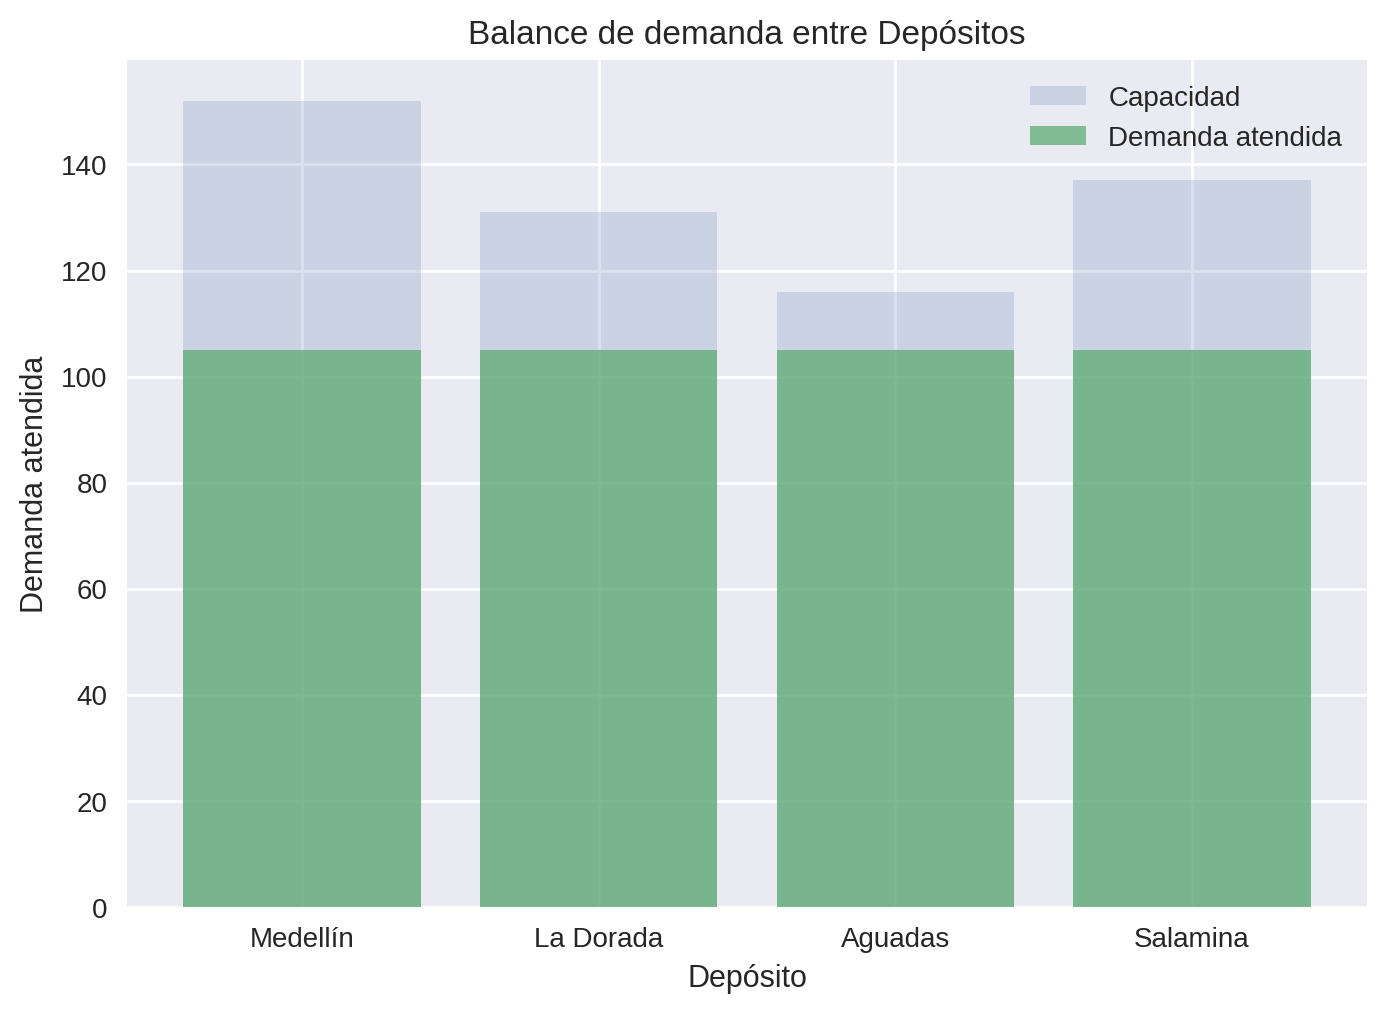

In [20]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
plt.style.use("seaborn-v0_8")

utilizado = []
for i in Depositos:
    utilizado.append(sum(produccion[j] * x[i, j].value() for j in Centros))

plt.bar(
    Depositos, [cap - 1 for cap in capacidad.values()], alpha=0.2, label="Capacidad"
)
plt.bar(Depositos, utilizado, alpha=0.7, label="Demanda atendida")
plt.legend()
plt.xlabel("Depósito")
plt.ylabel("Demanda atendida")
plt.title("Balance de demanda entre Depósitos")
plt.show()

## Opcional (0 puntos)

*Una vez esté listo el modelo, puedes cambiar los valores de los parámetros a continuación para verificar cómo cambian las soluciones y la función objetivo. Para esto debes correr nuevamente las celdas que crean el modelo desde el principio*

In [ ]:
# Parámetros modificables
q = 300 * 1000 / 1000000  # $300/ton/km*factor de conversion (mil ton/millon $)
mejor_costo = 24881  # Función objetivo del caso de minimizacion de costos

**Reflexión**: ¿Qué aspecto particular puedes notar en la visualización de la solución? ¿Crees que está relacionado con la función objetivo?